# Wine Reviews

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [2]:
df = pd.read_csv(".../input/winemag-data_first150k.csv", index_col=0)
#df2 = pd.read_csv(".../input/winemag-data-130k-v2.csv")

Running all of the initial features to get a starting idea

In [3]:
df.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


In [5]:
df.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


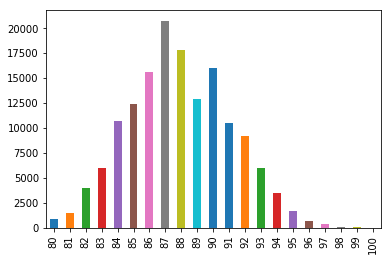

In [6]:
df['points'].value_counts().sort_index().plot.bar()

From the above bar chart we can see that the points given have a distribution similar to a normal distribution. Values 89 and 90 do not adhere to a normal distribution but this is more likely due to skew from the industry. The difference between 89 and 90 points numerically is no different than the rest but in terms of the point rating on wine spectator it jumps the wine to a more prestigious category.

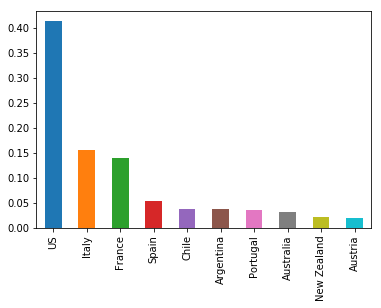

In [7]:
(df['country'].value_counts().head(10) / len(df)).plot.bar()

As wine spectator is the leading magazine in regards to all things wine it is not surprising that a majority of wines that head to Wine Spectator for review would primarily be from the US at 40% over the next country, Italy, at 15%.

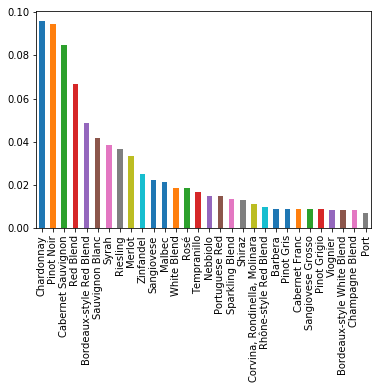

In [8]:
(df['variety'].value_counts().head(30) / len(df)).plot.bar()

In [9]:
len(df['variety'].value_counts()) #The total number of wine varieties reviewed in the database.

632

In [10]:
df['variety'].value_counts().head(30).sum() #Greatest amount of wine varieities reviewed by Wine Spectator

123452

In [11]:
df['variety'].value_counts().head(30).sum() / df['variety'].value_counts().sum() #Percentage of total

0.817942092360697

With 632 wine varieties the 30 most reviewed wine varieties make up 81% of the total reviews. Knowing this, if I owed a vineyard, statistically which wine varieties give me the highest mean point evaluation.

In [12]:
# I couldn't think of a nice compact way of getting this outcome but it works
variety_grouped = df.groupby(['variety']).mean()
#Create a counts column to sort by
variety_grouped['counts'] = df.groupby(['variety'])['variety'].count() 
#Sort by counts and save the top 30 wine varieties
variety_grouped = variety_grouped.sort_values(by=['counts'], ascending=False).head(30)
#Since only 30 wines are now saved to the variety_grouped DataFrame we can sort by points
variety_grouped.sort_values(by=['points'], ascending=False).reset_index()

,variety,points,price,counts
0,Nebbiolo,90.481481,66.406802,2241
1,Sangiovese Grosso,90.307578,60.607676,1346
2,Champagne Blend,90.002423,78.627119,1238
3,Bordeaux-style White Blend,89.473434,36.720690,1261
4,Bordeaux-style Red Blend,89.466857,49.163476,7347
5,Pinot Noir,88.719404,44.084605,14291
6,"Corvina, Rondinella, Molinara",88.681332,46.459752,1682
7,Portuguese Red,88.613267,23.829470,2216
8,Riesling,88.461079,29.621834,5524
9,Port,88.460302,51.797724,1058


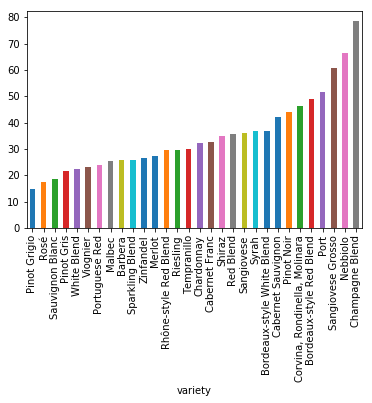

In [13]:
variety_grouped['price'].sort_values().plot.bar()

Highest rated wines by winery???

In [14]:
# I couldn't think of a nice compact way of getting this outcome but it works
wine_grouped = df.groupby(['winery']).mean()
#Create a counts column to sort by
wine_grouped['counts'] = df.groupby(['winery'])['winery'].count() 
#Sort by counts and save the top 30 wine varieties
wine_grouped = wine_grouped.sort_values(by=['counts'], ascending=False).head(50)
#Since only 30 wines are now saved to the variety_grouped DataFrame we can sort by points
wine_grouped.sort_values(by=['points'], ascending=False)

,points,price,counts
winery,,,
Louis Jadot,92.401639,105.218182,122
Williams Selyem,92.320856,56.973046,374
Bründlmayer,91.214876,45.951220,121
Sineann,91.036496,39.496350,137
Testarossa,90.846715,48.602190,274
Bouchard Père & Fils,90.827586,121.125000,203
Iron Horse,90.633803,40.964789,142
Albert Bichot,90.580838,50.677419,167
Joseph Drouhin,90.343915,84.389189,189


Which country produces the highest wines on average??

In [15]:
# How about for countries now...
country_grouped = df.groupby(['country']).mean()
#Create a counts column to sort by
country_grouped['counts'] = df.groupby(['country'])['country'].count() 
#Sort by counts and save the top 20 countries by number of reviewed wines
country_grouped = country_grouped.sort_values(by=['counts'], ascending=False).head(20)
# Sort
country_grouped.sort_values(by=['points'], ascending=False)

,points,price,counts
country,,,
Austria,89.276742,31.192106,3057
France,88.925870,45.619885,21098
Germany,88.626427,39.011078,2452
Italy,88.413664,37.547913,23478
Canada,88.239796,34.628866,196
Slovenia,88.234043,28.061728,94
Portugal,88.057685,26.332615,5322
Australia,87.892475,31.258480,4957
US,87.818789,33.653808,62397


Plots of grouped winery, country, and variety points versus their respective prices

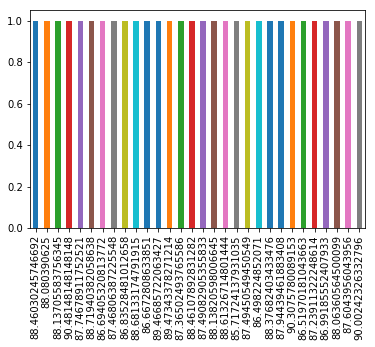

In [16]:
variety_grouped['points'].value_counts().head(30).plot(y='points', kind='bar')

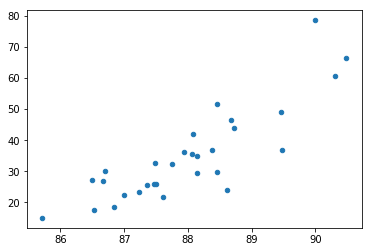

In [17]:
plt.scatter(variety_grouped['points'], variety_grouped['price'], s=20);

# Machine Learning Section

Create a y list to be used inconjuction with the remaining dataset

In [18]:
# In case we need the description separated for use later on
df_description = df.description
df_description.head()

0    This tremendous 100% varietal wine hails from ...
1    Ripe aromas of fig, blackberry and cassis are ...
2    Mac Watson honors the memory of a wine once ma...
3    This spent 20 months in 30% new French oak, an...
4    This is the top wine from La Bégude, named aft...
Name: description, dtype: object

In [19]:
df_nop = df.drop('designation', 1)
df_nop = df_nop.drop('region_1', 1)
df_nop = df_nop.drop('region_2', 1)
df_nop = df_nop.drop('winery', 1)
df_nop = df_nop.drop('description', 1)
#df_nop = df_nop.drop('Unnamed: 0',1) # duplicate of the current index


In [20]:
df_nop = df_nop.dropna(how='any') # dropping any rows that have na values

df_nop.head()

,country,points,price,province,variety
0,US,96,235.0,California,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Tinta de Toro
2,US,96,90.0,California,Sauvignon Blanc
3,US,96,65.0,Oregon,Pinot Noir
4,France,95,66.0,Provence,Provence red blend


Train test split of the cleaned dataframe

In [21]:
yp = df_nop.points
df_nop = df_nop.drop('points', 1) # 0 is for row, 1 is for column

yp.head()

0    96
1    96
2    96
3    96
4    95
Name: points, dtype: int64

In [22]:
df_cat = df_nop.copy()
df_cat['country'] = df_cat['country'].astype('category')
df_cat['province'] = df_cat['province'].astype('category')
df_cat['variety'] = df_cat['variety'].astype('category')

df_cat.dtypes

country     category
price        float64
province    category
variety     category
dtype: object

In [23]:
#To change the string values of the country, province, and variety into categorical values for calculation
cat_columns = df_cat.select_dtypes(['category']).columns
cat_columns
df_cat[cat_columns] = df_cat[cat_columns].apply(lambda x: x.cat.codes)

df_cat.head()

,country,price,province,variety
0,42,235.0,51,69
1,39,110.0,273,541
2,42,90.0,51,458
3,42,65.0,281,394
4,14,66.0,312,414


In [24]:
X_train_cat, X_test_cat, yp_train, yp_test = train_test_split(df_cat, yp, test_size=0.20)

In [25]:
X_train_cat.head()

,country,price,province,variety
37988,42,12.0,265,426
6348,21,50.0,299,341
38333,42,18.0,51,109
136778,42,16.0,281,391
43403,3,71.0,172,211


## Decision Tree

In [26]:
from sklearn import tree
model_clf = tree.DecisionTreeClassifier(criterion='gini')
data_feature_names = list(X_train_cat)

In [27]:
model_clf.fit(X_train_cat, yp_train)
model_clf.score(X_train_cat, yp_train)
predicted= model_clf.predict(X_train_cat)

In [28]:
print(model_clf.score(X_train_cat, yp_train))

0.4381512788748816


## K-Means clustering of country variety data

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

NameError: name 'X' is not defined

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [ ]:
# Visualize data
dot_data = tree.export_graphviz(model_clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

### Let's have some fun with word cloud. Below a test size of 20% (due to computation intensity) is going to be used to create a wordcloud using the most often words used in the description of a wine.

In [137]:
X_train_words, X_test_words = train_test_split(df, test_size=0.20)

In [138]:
X_test_words.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
71940,US,This wine earns a high score for sheer extrava...,O.P.C. 10th Anniversary,92,48.0,California,Napa Valley,Napa,Red Blend,Buoncristiani
66040,New Zealand,"Starts off well, with aromas of toast, vanilla...",Gimblett,86,35.0,Hawke's Bay,NaN,NaN,Merlot,Trinity Hill
19717,US,"Rich, ripe and tropical, this calls to mind ba...",NaN,88,18.0,Oregon,Oregon,Oregon Other,Chardonnay,King Estate
19863,Spain,"Aromas of bold black cherry, leather, bacon an...",Reserve,91,32.0,Northern Spain,Rioja,NaN,Tempranillo,Baigorri
91738,US,"Nice and dry, with fine, firm tannins. Quite a...",Estate,87,51.0,California,Howell Mountain,Napa,Cabernet Franc,White Cottage Ranch


In [29]:
comment_words = ' '
stopwords = set(STOPWORDS)
stopwords.add('wine')
stopwords.add('flavor')
stopwords.add('flavors')
stopwords.add('note')
stopwords.add('aroma')
stopwords.add('aromas')
stopwords.add('finish')
stopwords.add('palate')
stopwords.add('show')
stopwords.add('shows')
stopwords.add('nose')
stopwords.add('well')
stopwords.add('feel')
stopwords.add('mouth')
stopwords.add('notes')
stopwords.add('note')

In [30]:
# iterate through the csv file 
for val in X_test20.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
        
        


In [31]:
with open("Output.txt", "w") as text_file:
    text_file.write(comment_words)

In [34]:
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  


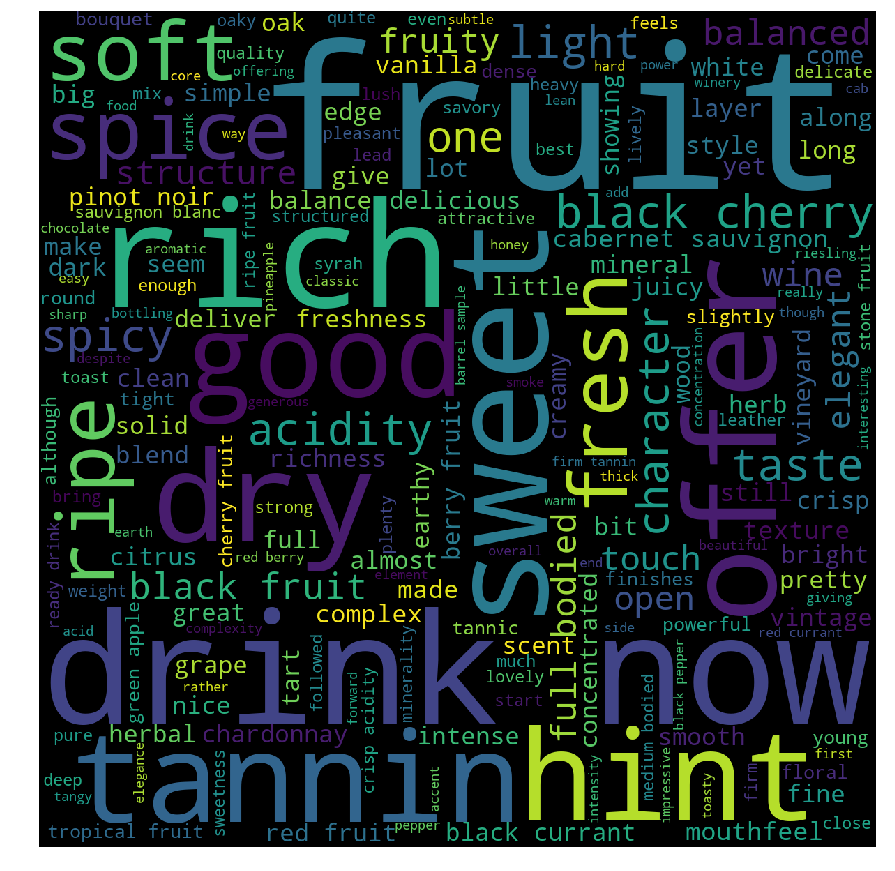

In [36]:
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 